In [1]:
filename = 'iris.data'
f = open(filename,'r')

datapoints = []

for x in f:
    temp_ls = []
    temp = ''
    for ch in x:
        if (ch >= '0' and ch <='9') or (ch == '.'):
#             print('ch:' + ch +' temp:' + temp)
            temp += ch
        elif ch == ',':
#             print('temp:' + temp)
            temp_ls.append(float(temp))
            temp = ''
        else:
            if(temp_ls != []):
                datapoints.append(temp_ls)
            break

# print(datapoints)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

principal_components = pca.fit_transform(datapoints)
principal_components

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

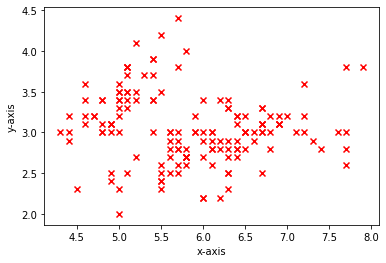

In [4]:
import matplotlib.pyplot as plt 

x_arr = []
y_arr = []

for point in datapoints:
    x_arr.append(point[0])
    y_arr.append(point[1])
 
plt.scatter(x_arr,y_arr, c = 'red', marker = 'x')

plt.xlabel('x-axis') 
plt.ylabel('y-axis') 

# plt.title('SSE vs num of clusters') 

plt.show() 


In [5]:
def inverse(mat):
    
    a = mat[0][0]
    b = mat[0][1]
    c = mat[1][0]
    d = mat[1][1]
    
    det_mat = (a*d-b*c)
    
    inv_mat = [[d/det_mat,-b/det_mat],[-c/det_mat,a/det_mat]]
    
#     print(inv_mat)
    
    return inv_mat

In [6]:
def det(mat):
    return (mat[0][0]*mat[1][1] - mat[0][1]*mat[1][0])

In [7]:
import math

In [8]:
def gaussian_pdf(point, mean, cov_matrix):
    normalised_point = []
    for i in range(2):
        temp = point[i] - mean[i]
        normalised_point.append(temp)

    inv_cov_matrix = inverse(cov_matrix)

    exponential_term = (normalised_point[0]**2) * inv_cov_matrix[0][0]
    exponential_term += (normalised_point[0] * normalised_point[1]) * inv_cov_matrix[1][0]
    exponential_term += (normalised_point[0] * normalised_point[1]) * inv_cov_matrix[0][1]
    exponential_term += (normalised_point[1] ** 2) * inv_cov_matrix[1][1]

    result = (((2*math.pi)**-1) * (1/math.sqrt(det(cov_matrix))) * ( math.exp(-0.5*exponential_term)))
    return result

In [9]:
def expectation_step(means, cov_matrix, mixture_parameters,current_weight):
    new_weight = []
    
    for i in range(K):
        temp_ls = []
        for j in range(len(principal_components)):
            temp_ls.append(0)

        new_weight.append(temp_ls)
    
    for j in range(len(principal_components)):
        temp_wt = []
        for i in range(K):
            gaussian_result = gaussian_pdf(principal_components[j],means[i],cov_matrix[i])
            temp_wt.append(mixture_parameters[i] * gaussian_result)

        mixture_sum = 0
        for i in range(K):
            mixture_sum += temp_wt[i]

        for i in range(K):
            new_weight[i][j] = temp_wt[i]/mixture_sum
    
    return new_weight

In [10]:
def maximize_means(current_means,weight):
    sum_d1 = 0
    sum_d2 = 0
    
    new_means = []
    
    for i in range(K):
        temp_ls = [0,0]
        new_means.append(temp_ls)

    for i in range(K):
        weights_sum = 0
        sum_d1 = 0
        sum_d2 = 0
        for j in range(len(principal_components)):
            weights_sum += weight[i][j]
            sum_d1 += weight[i][j]*principal_components[j][0]
            sum_d2 += weight[i][j]*principal_components[j][1]
        
#         print('i:' + str(i) + ' weights_sum:' + str(weights_sum) + ' sum_d1:'+ str(sum_d1) + ' sum_d2:' + str(sum_d2))
        new_means[i][0] = sum_d1/weights_sum
        new_means[i][1] = sum_d2/weights_sum
    
    return new_means

In [11]:
def maximize_covariance(current_cov_matrix,means,weight):
    sum_00 = 0
    sum_01 = 0
    sum_10 = 0
    sum_11 = 0
    
    new_cov_matrix = []
    temp_ls = [[1,0],[0,1]]
    
    for i in range(K):
        new_cov_matrix.append(temp_ls)
        
    
    for i in range(K):
        weights_sum = 0
#         new_cov_matrix.append([[],[]])
        sum_00 = 0
        sum_01 = 0
        sum_10 = 0
        sum_11 = 0
        for j in range(len(principal_components)):
            normalized_point = []
            for d in range(2):
                normalized_point.append(principal_components[j][d] - means[i][d])
            
            weights_sum += weight[i][j]
            sum_00 += (normalized_point[0]**2) * (weight[i][j])
            sum_01 += (normalized_point[0]*normalized_point[1]) * (weight[i][j])
            sum_10 += (normalized_point[0]*normalized_point[1]) * (weight[i][j])
            sum_11 += (normalized_point[1]**2) * (weight[i][j])
        
        temp_ls = [[sum_00/weights_sum,sum_01/weights_sum],[sum_10/weights_sum,sum_11/weights_sum]]
        new_cov_matrix[i] = temp_ls
    
    return new_cov_matrix

In [12]:
def maximize_mix_parameters(current_mixture_parameters,weight):
    new_mixture_parameters = []
    
    for i in range(K):
        new_mixture_parameters.append(0)
    
    for i in range(K):
        weights_sum = 0
#         new_mixture_parameters.append([])
        for j in range(len(principal_components)):
            weights_sum += weight[i][j]
            
        new_mixture_parameters[i] = weights_sum/len(principal_components)
    return new_mixture_parameters

In [13]:
def distance(current_means,new_means):
    total_sum = 0
    for i in range(K):
        diff = 0
        for d in range(2):
            diff += current_means[i][d] - new_means[i][d]
#             print('diff:' + str(diff))
        
        total_sum += diff ** 2
    
#     print('distance:' + str(total_sum))
    return total_sum

In [14]:
import time

K = 3
n = len(principal_components)
epsilon = 0.001

means = [[-3.59,0.25],[-1.09,-0.46],[0.75,1.07]]
cov_matrix = [
                [[1,0],[0,1]], 
                [[1,0],[0,1]], 
                [[1,0],[0,1]]
             ]
mixture_parameters = [1/3,1/3,1/3]

weight = []
for i in range(K):
    temp_ls = []
    for j in range(len(principal_components)):
        temp_ls.append(0)
    
    weight.append(temp_ls)

iteration_count = 0

start = time.time()

while(True):
    updated_weight = expectation_step(means, cov_matrix, mixture_parameters,weight)
    weight = updated_weight
    updated_means = maximize_means(means,weight)
    updated_cov_matrix = maximize_covariance(cov_matrix,means,weight)
    updated_mixture_parameters = maximize_mix_parameters(mixture_parameters,weight)
    
    iteration_count += 1
    print('iteration:' + str(iteration_count))
    print('means: ' + str(means))
    print('cov_matrix: ' + str(cov_matrix))
    print('mixture_parameters: ' + str(mixture_parameters))
    print('distance:' + str(distance(means, updated_means)))
    print()
    
    if(distance(means, updated_means) < epsilon):
#         print('distance:' + str(distance))
        iteration_count += 1
        print('iteration:' + str(iteration_count))
        print('means: ' + str(means))
        print('cov_matrix: ' + str(cov_matrix))
        print('mixture_parameters: ' + str(mixture_parameters))
        print('distance:' + str(distance(means, updated_means)))
        print()
        break
    
    
    means = updated_means
    cov_matrix = updated_cov_matrix
    mixture_parameters = updated_mixture_parameters

end = time.time()
print('Time taken:' + str(end-start))

iteration:1
means: [[-3.59, 0.25], [-1.09, -0.46], [0.75, 1.07]]
cov_matrix: [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]]
mixture_parameters: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
distance:1.0664400827042149

iteration:2
means: [[-2.6588940415237623, 0.19071150596584147], [-0.7636290555847466, -0.25280136778788403], [1.6345179157483736, 0.03824792280908418]]
cov_matrix: [[[0.9236647344780186, -0.001304413478013138], [-0.001304413478013138, 0.22756023848035611]], [[2.3618822638843313, -0.2856772509864479], [-0.2856772509864479, 0.31070987534416816]], [[1.6183226570567832, -0.6813157675027476], [-0.6813157675027476, 1.2483547714704597]]]
mixture_parameters: [0.23773854315098053, 0.25595112360369, 0.5063103332453291]
distance:0.10268218836049546

iteration:3
means: [[-2.6181723999965465, 0.20825363820076792], [-0.41160109277615836, -0.29400667975146444], [1.6713589670086941, 0.053144679283260006]]
cov_matrix: [[[0.10097234092838121, 0.04000850247820632], [

In [16]:
for j in range(len(datapoints)):
    print('index:' + str(j) + ' ' + str(weight[0][j]) + ' ' + str(weight[1][j]) + ' ' + str(weight[2][j]))

index:0 0.9999999996518971 2.51368652037043e-10 9.673420107441385e-11
index:1 0.9999997748179584 1.389864260669637e-07 8.619561548826892e-08
index:2 0.9999999432163368 3.695479047591946e-08 1.9828872779133672e-08
index:3 0.9999989817231318 5.932343834128338e-07 4.2504248473001964e-07
index:4 0.9999999997560217 1.7876041657057173e-10 6.521787630670999e-11
index:5 0.9999999999669735 2.2378093298362424e-11 1.0648432101571943e-11
index:6 0.9999999619464245 2.4953841365242538e-08 1.3099734237750724e-08
index:7 0.9999999950254972 3.3835984373303542e-09 1.5909044159592465e-09
index:8 0.9999923808513678 3.909960546261983e-06 3.709188086003665e-06
index:9 0.9999998571749439 8.954531064245503e-08 5.32797454941794e-08
index:10 0.9999999999900825 7.255291948117889e-12 2.6621966546096354e-12
index:11 0.9999999547386883 2.9264730999505595e-08 1.599658073962131e-08
index:12 0.9999997258595279 1.6756691437010182e-07 1.065735576577258e-07
index:13 0.9999967667406876 1.8140060530402114e-06 1.41925325924

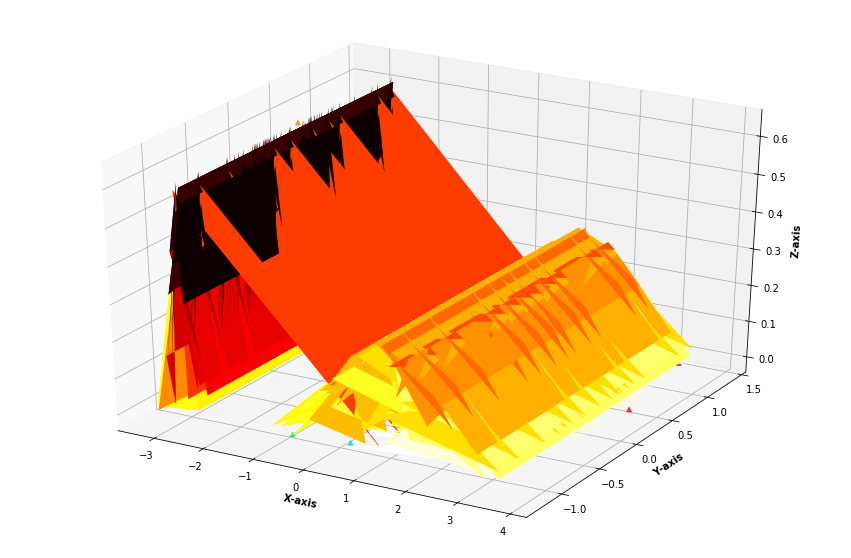

In [17]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

ax = plt.axes(projection = '3d')

z = []
x = []
y = []
for j in range(len(principal_components)):
    x.append(principal_components[j][0])
    y.append(principal_components[j][1])
    
    temp_wt = []
    for i in range(K):
        gaussian_result = gaussian_pdf(principal_components[j],means[i],cov_matrix[i])
        temp_wt.append(mixture_parameters[i] * gaussian_result)
        
    mixture_sum = 0
    for i in range(K):
        mixture_sum += temp_wt[i]
        
    z.append(mixture_sum)

X,Y = np.meshgrid(x,y)
Z,T = np.meshgrid(z,z)
ax.plot_surface(X,Y,Z,cmap='hot_r', edgecolor='none')

my_cmap = plt.get_cmap('hsv')


ax.scatter3D(x, y, z,alpha = 0.8,c = x , cmap = my_cmap, marker ='^')

ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

plt.show()
# print(Z)